In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest,f_classif
  
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")






# red wine
# https://raw.githubusercontent.com/dsrscientist/DSData/master/winequality-red.csv 

In [2]:
data=pd.read_csv("https://raw.githubusercontent.com/dsrscientist/DSData/master/winequality-red.csv ")

In [3]:
data.head()


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [4]:
data.shape

(1599, 12)

In [5]:
rows_before=data.shape[0]
rows_before

1599

In [6]:
j=1
for i in data.columns:
    print(j,']', i,':')
    print(data[i].unique())
    print('*'*60)
    j+=1

1 ] fixed acidity :
[ 7.4  7.8 11.2  7.9  7.3  7.5  6.7  5.6  8.9  8.5  8.1  7.6  6.9  6.3
  7.1  8.3  5.2  5.7  8.8  6.8  4.6  7.7  8.7  6.4  6.6  8.6 10.2  7.
  7.2  9.3  8.   9.7  6.2  5.   4.7  8.4 10.1  9.4  9.   8.2  6.1  5.8
  9.2 11.5  5.4  9.6 12.8 11.  11.6 12.  15.  10.8 11.1 10.  12.5 11.8
 10.9 10.3 11.4  9.9 10.4 13.3 10.6  9.8 13.4 10.7 11.9 12.4 12.2 13.8
  9.1 13.5 10.5 12.6 14.  13.7  9.5 12.7 12.3 15.6  5.3 11.3 13.   6.5
 12.9 14.3 15.5 11.7 13.2 15.9 12.1  5.1  4.9  5.9  6.   5.5]
************************************************************
2 ] volatile acidity :
[0.7   0.88  0.76  0.28  0.66  0.6   0.65  0.58  0.5   0.615 0.61  0.62
 0.56  0.59  0.32  0.22  0.39  0.43  0.49  0.4   0.41  0.71  0.645 0.675
 0.685 0.655 0.605 0.38  1.13  0.45  0.67  0.52  0.935 0.29  0.31  0.51
 0.42  0.63  0.69  0.735 0.725 0.705 0.785 0.75  0.625 0.3   0.55  1.02
 0.775 0.9   0.545 0.575 0.33  0.54  1.07  0.695 1.33  0.745 1.04  0.715
 0.415 0.34  0.68  0.95  0.53  0.64  0.885 0.80

* All features are in numeric.
* Exept target , All features are continuous 

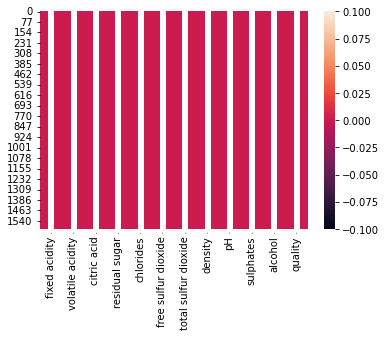

In [7]:
sns.heatmap(data.isnull(),annot=True)
plt.show()

In [8]:
data.isna().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [9]:
data.isna().sum().sum()

0

* There are no NaN observed in dataset 

* As target Feature is ordinal ,Let us convert Target Feature into binomial feature 

In [10]:
data['quality'].unique()

array([5, 6, 7, 4, 8, 3], dtype=int64)

In [11]:
data['quality'].value_counts()

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

In [12]:
# one way of transforamtion with defining function 
def Bi(x):
    if x<7:
        return 0
    else:
        return 1
    
f=data['quality'].apply(Bi)
f

0       0
1       0
2       0
3       0
4       0
       ..
1594    0
1595    0
1596    0
1597    0
1598    0
Name: quality, Length: 1599, dtype: int64

In [13]:
data['Bi_qual']=data['quality'].apply(lambda x: 0 if x<7 else 1)
data['Bi_qual']

0       0
1       0
2       0
3       0
4       0
       ..
1594    0
1595    0
1596    0
1597    0
1598    0
Name: Bi_qual, Length: 1599, dtype: int64

In [14]:
data['Bi_qual'].value_counts()

0    1382
1     217
Name: Bi_qual, dtype: int64

<AxesSubplot:>

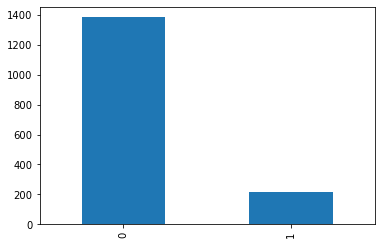

In [15]:
data['Bi_qual'].value_counts().plot.bar()

In [16]:
data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Bi_qual
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023,0.135710
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569,0.342587
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000,0.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000,0.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000,0.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000,0.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000,1.000000


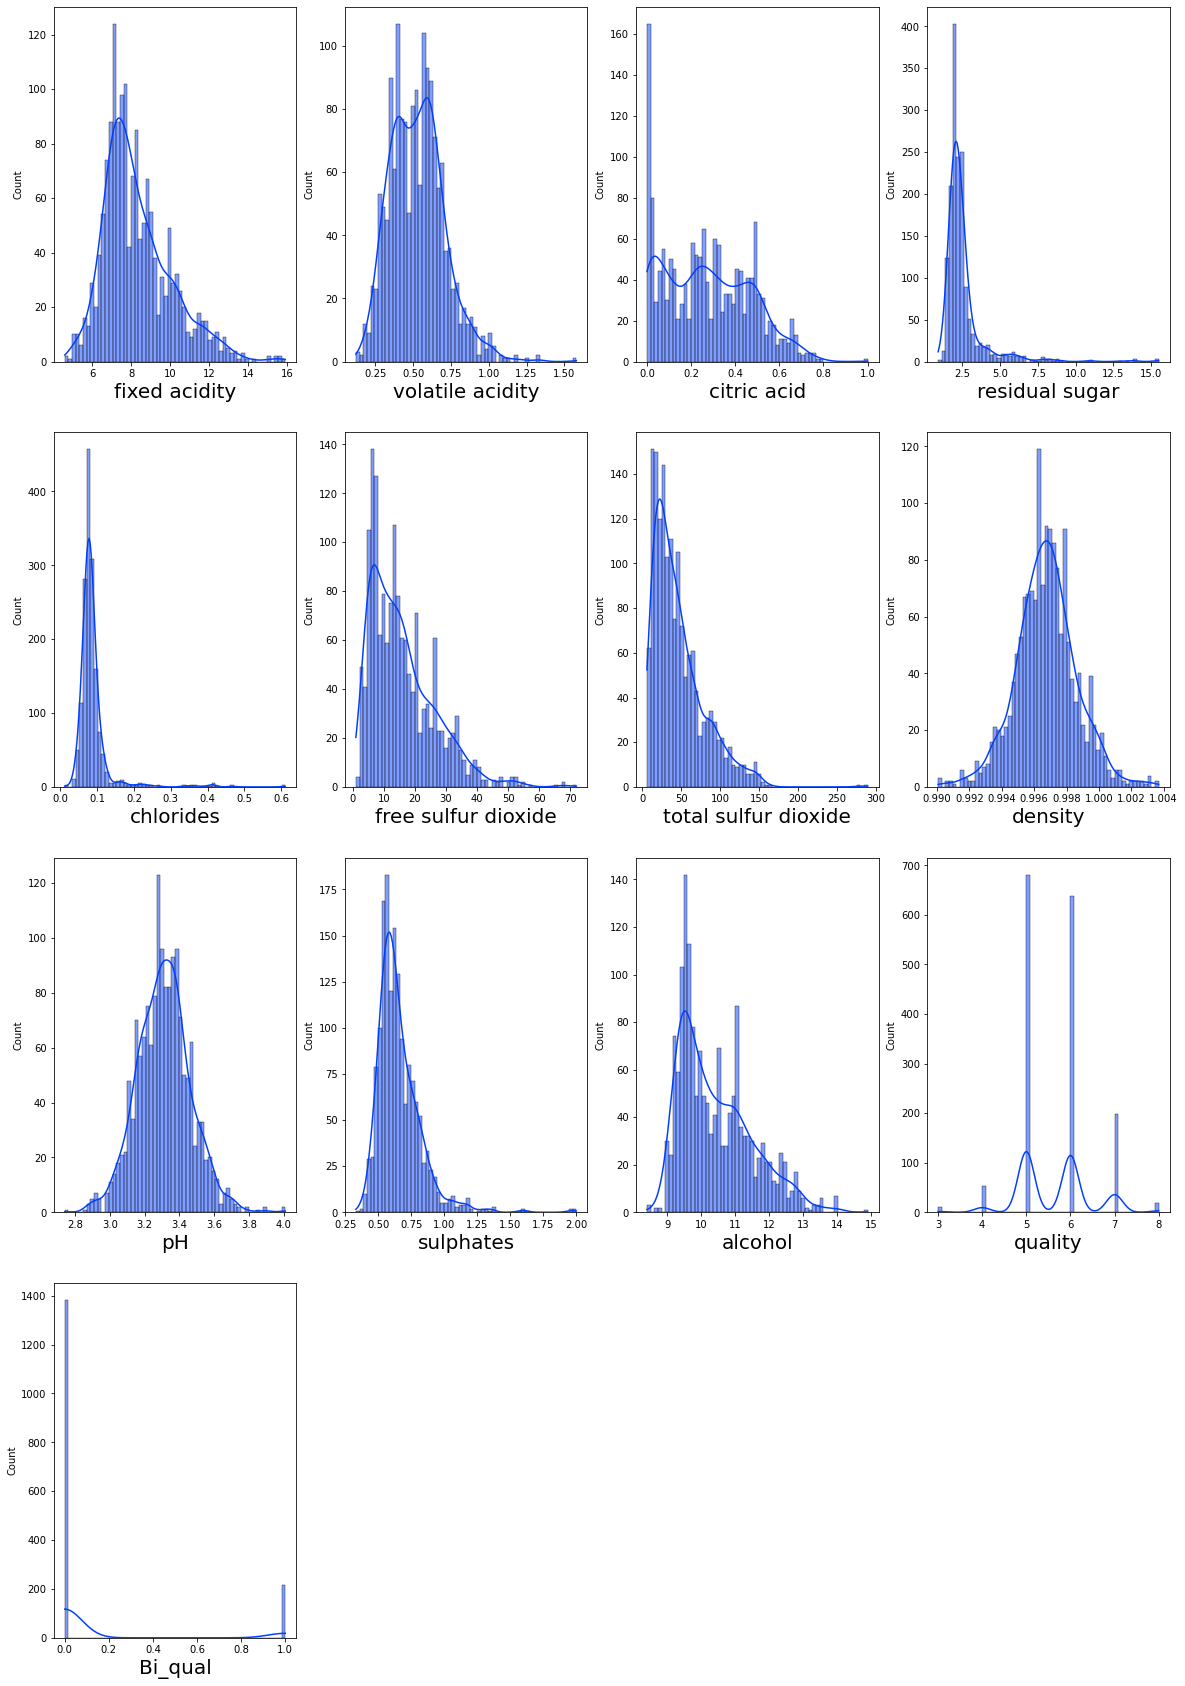

<Figure size 432x288 with 0 Axes>

In [17]:
plt.figure(figsize=(20,30))
sns.set_palette('bright')
graph=1

for column in data.columns:
    if graph<=13:
        ax=plt.subplot(4,4,graph)
        sns.histplot(data[column],bins=60,kde=True)
        plt.xlabel(column,fontsize=20)
        
    graph+=1
plt.show()
plt.tight_layout()

* Leaving density and pH  features , other all features are not normally distributed and also having outliers ,so analyse this with boxplot and skewness 

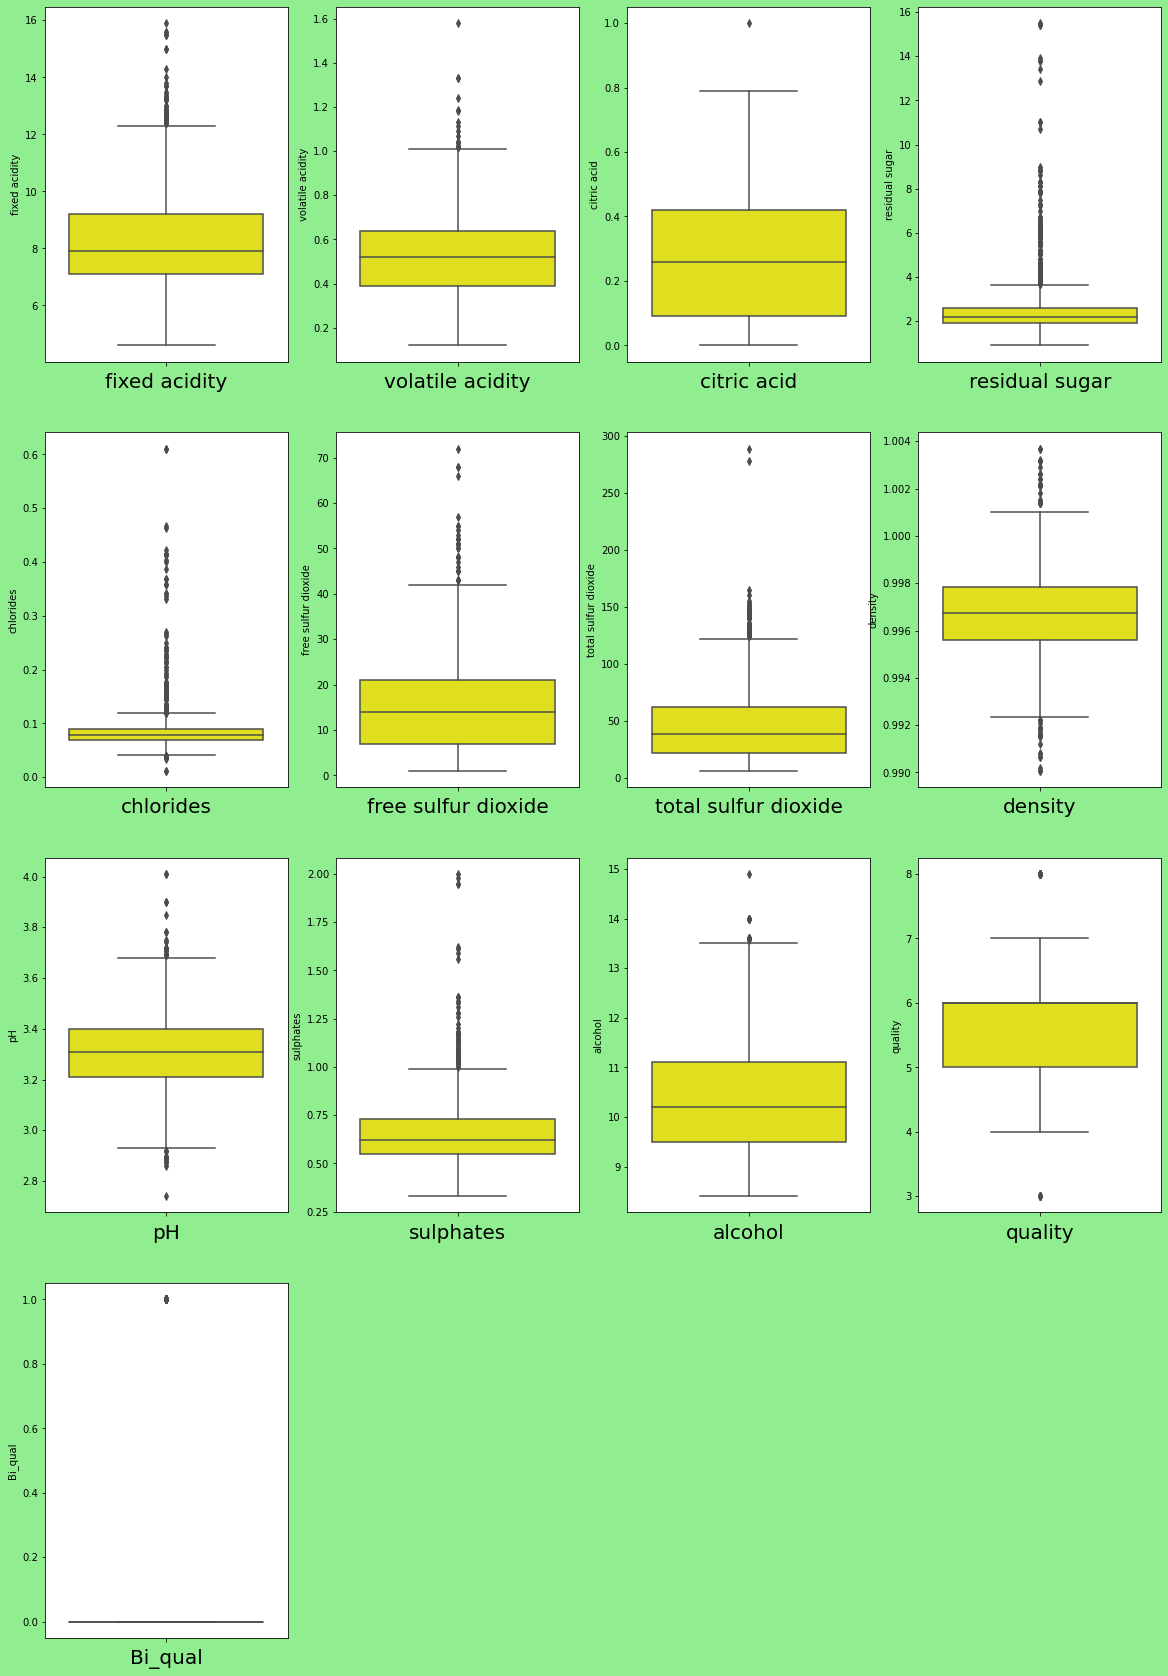

<Figure size 432x288 with 0 Axes>

In [18]:
plt.figure(figsize=(20,30),facecolor='lightgreen')
sns.set_palette('bright')
graph=1

for column in data.columns:
    if graph<=13:
        ax=plt.subplot(4,4,graph)
        sns.boxplot(y=data[column],color='yellow')
        plt.xlabel(column,fontsize=20)
        
    graph+=1
plt.show()
plt.tight_layout()

* All feature have outliers as observed from boxplot

In [19]:
q1=data.quantile(0.25)
q3=data.quantile(0.75)
iqr=q3-q1
Quant=pd.DataFrame({'Q1':q1,'Q3':q3,'IQR':iqr})
Quant

,Q1,Q3,IQR
fixed acidity,7.1000,9.200000,2.100000
volatile acidity,0.3900,0.640000,0.250000
citric acid,0.0900,0.420000,0.330000
residual sugar,1.9000,2.600000,0.700000
chlorides,0.0700,0.090000,0.020000
free sulfur dioxide,7.0000,21.000000,14.000000
total sulfur dioxide,22.0000,62.000000,40.000000
density,0.9956,0.997835,0.002235
pH,3.2100,3.400000,0.190000
sulphates,0.5500,0.730000,0.180000


* loss in IQR proximity  method is large about 30 percent 
let us perform zscore


In [20]:
data.skew().sort_values(ascending=False)

chlorides               5.680347
residual sugar          4.540655
sulphates               2.428672
Bi_qual                 2.129363
total sulfur dioxide    1.515531
free sulfur dioxide     1.250567
fixed acidity           0.982751
alcohol                 0.860829
volatile acidity        0.671593
citric acid             0.318337
quality                 0.217802
pH                      0.193683
density                 0.071288
dtype: float64

* All feature are highly skewed (skewness > +- 0.5) except density feature 

In [21]:
from scipy.stats import zscore
z_scr=np.abs(zscore(data.drop(['quality','Bi_qual'],axis=1))) # Outlier detection  only for continuous feature 
data[(z_scr<=3).all(axis=1)] # apply this on all dataset values so that count of all feature wil be equal


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Bi_qual
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,0
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5,0
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5,0
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6,0
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5,0
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6,0
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6,0
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5,0


In [22]:
rows_after=data[(z_scr<=3).all(axis=1)].shape[0]
rows_after

1458

In [23]:
loss=((rows_before-rows_after)/rows_before)*100  # data loss wrt original data 
loss

8.818011257035648

* commit this zscore on data 

In [24]:
data=data[(z_scr<=3).all(axis=1)]

is it valid to use zscore <=3 in outlier removal or detection , or it should be strictly less than 3(i.e. zscore<3) ?

In [25]:
data.shape

(1458, 13)

In [26]:
data=data.drop(['quality'],axis=1)

* analysing the corelation  and multicollinearity

In [27]:
corr=data.corr().abs()
corr

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,Bi_qual
fixed acidity,1.000000,0.296566,0.699747,0.175809,0.187853,0.146702,0.098843,0.660497,0.704507,0.200796,0.018384,0.124746
volatile acidity,0.296566,1.000000,0.589286,0.032331,0.070307,0.008824,0.104585,0.000446,0.252900,0.350547,0.212767,0.268236
citric acid,0.699747,0.589286,1.000000,0.178784,0.104950,0.072097,0.007320,0.372338,0.521270,0.303401,0.164420,0.226809
residual sugar,0.175809,0.032331,0.178784,1.000000,0.121287,0.005795,0.091381,0.343236,0.072787,0.071218,0.162423,0.115612
chlorides,0.187853,0.070307,0.104950,0.121287,1.000000,0.057342,0.040874,0.330104,0.183105,0.025329,0.209711,0.112431
free sulfur dioxide,0.146702,0.008824,0.072097,0.005795,0.057342,1.000000,0.660348,0.039334,0.107444,0.059713,0.076400,0.085448
total sulfur dioxide,0.098843,0.104585,0.007320,0.091381,0.040874,0.660348,1.000000,0.116386,0.007726,0.037164,0.257834,0.171294
density,0.660497,0.000446,0.372338,0.343236,0.330104,0.039334,0.116386,1.000000,0.311217,0.127562,0.469611,0.154221
pH,0.704507,0.252900,0.521270,0.072787,0.183105,0.107444,0.007726,0.311217,1.000000,0.039558,0.136659,0.079528
sulphates,0.200796,0.350547,0.303401,0.071218,0.025329,0.059713,0.037164,0.127562,0.039558,1.000000,0.240684,0.310206


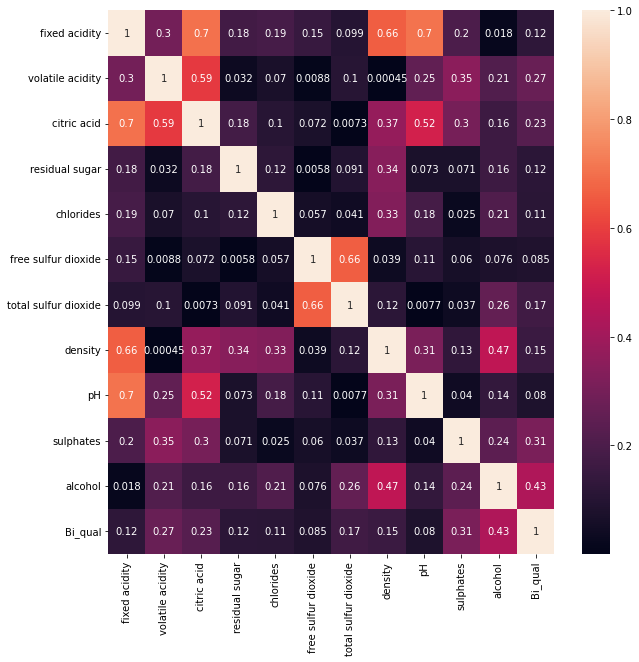

In [28]:
plt.figure(figsize=(10,10))
sns.heatmap(corr,annot=True)
plt.show()

A]
* fixed acidity have coorelation with pH
* fixed acidity have coorelation with density
* fixed acidity have coorelation with citric acid

B]
* voaltile acidity have coorelation with citric acid

 C] 
* free sulphar dioxide have corelation with total sulphar dioxide

* let us analyze this feature with Bivariate visualization 

<AxesSubplot:xlabel='fixed acidity', ylabel='citric acid'>

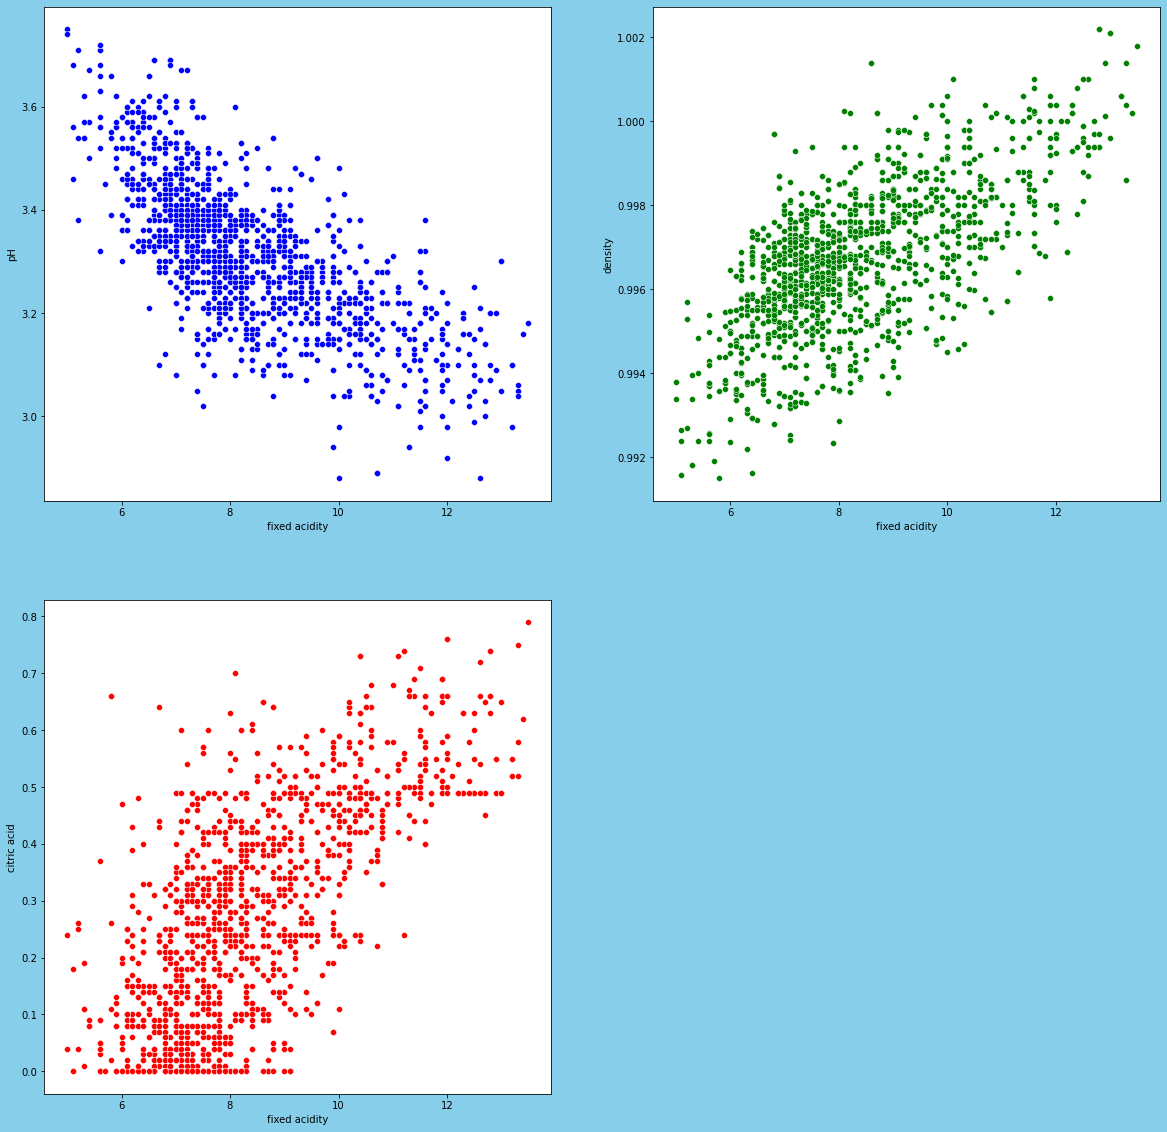

In [29]:
fig=plt.figure(figsize=(20,20),facecolor='skyblue')
fig.add_subplot(2,2,1)
sns.scatterplot(x=data['fixed acidity'],y=data['pH'],data=data,color='blue')
fig.add_subplot(2,2,2)
sns.scatterplot(x=data['fixed acidity'],y=data['density'],data=data,color='green')
fig.add_subplot(2,2,3)
sns.scatterplot(x=data['fixed acidity'],y=data['citric acid'],data=data,color='red')

*  fixed acidity feature have  strong relationship with pH,density and moderate relationship  with citric acid scatterplot

* let us analyse bivariate analysis of all 4 features with target variable (i.e. Bi_qual)

<AxesSubplot:xlabel='Bi_qual', ylabel='density'>

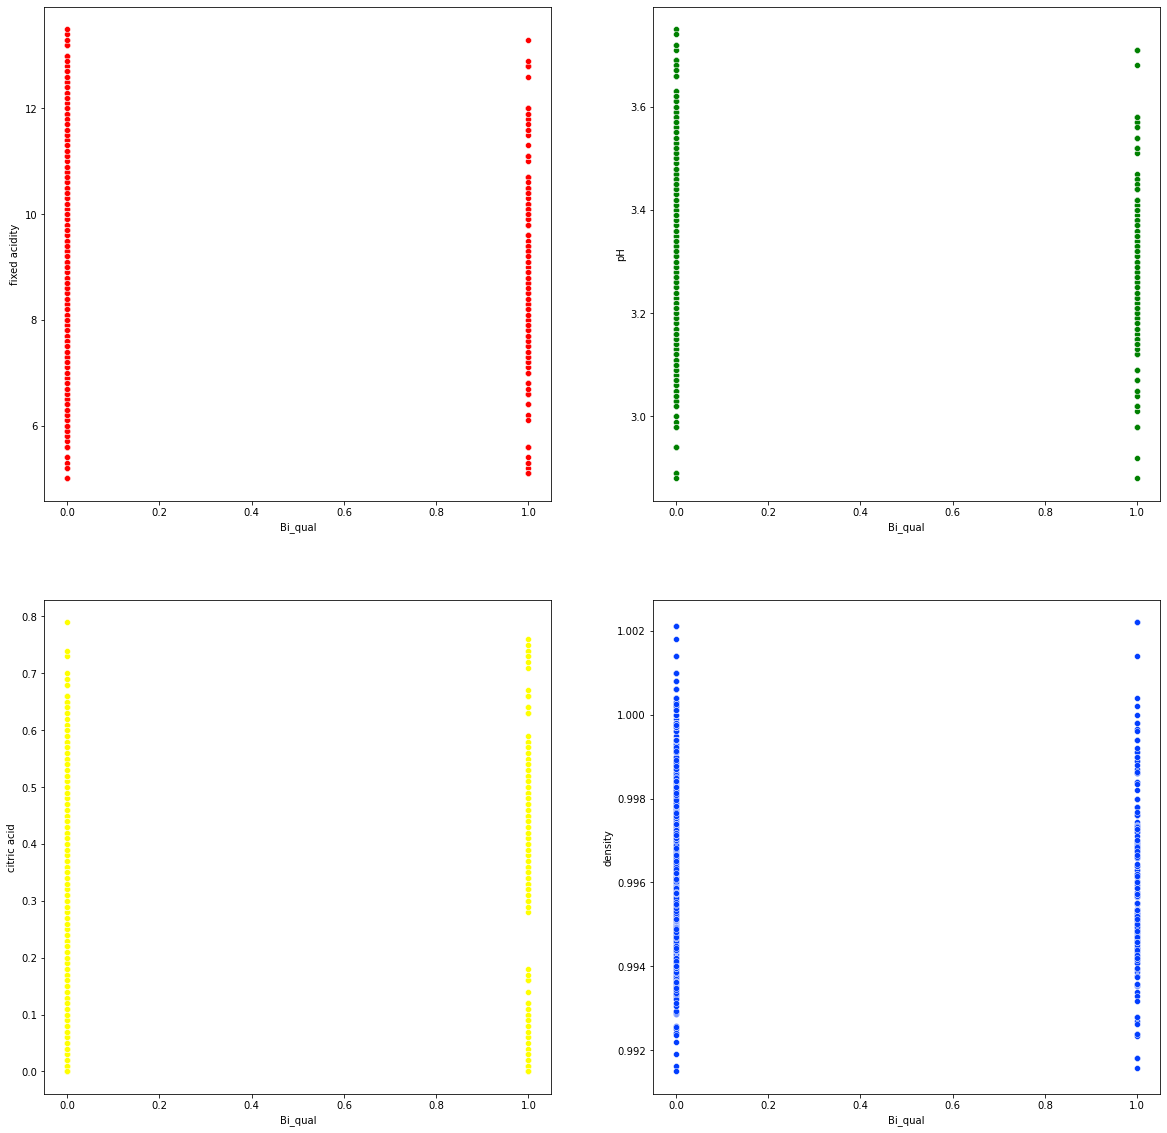

In [30]:

fig=plt.figure(figsize=(20,20))

# fixed acidity have corelation of 0.12 with Bi_qual
fig.add_subplot(2,2,1)
sns.scatterplot(y=data['fixed acidity'],x=data['Bi_qual'],data=data,color='red')

# pH have corelation of 0.08 with Bi_qual
fig.add_subplot(2,2,2)
sns.scatterplot(y=data['pH'],x=data['Bi_qual'],data=data,color='green')

# citric acid have corelation of 0.23 with Bi_qual
fig.add_subplot(2,2,3)
sns.scatterplot(y=data['citric acid'],x=data['Bi_qual'],data=data,color='yellow')

# density have corelation of 0.15 with Bi_qual
fig.add_subplot(2,2,4)
sns.scatterplot(y=data['density'],x=data['Bi_qual'],data=data)

*  1} As There is low correlation in fixed acidity and target feature and also fixed acidity 
   shows direct relationship with other variables.

In [31]:
corr1=(data.drop('fixed acidity',axis=1).corr()).abs()
corr1

,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,Bi_qual
volatile acidity,1.000000,0.589286,0.032331,0.070307,0.008824,0.104585,0.000446,0.252900,0.350547,0.212767,0.268236
citric acid,0.589286,1.000000,0.178784,0.104950,0.072097,0.007320,0.372338,0.521270,0.303401,0.164420,0.226809
residual sugar,0.032331,0.178784,1.000000,0.121287,0.005795,0.091381,0.343236,0.072787,0.071218,0.162423,0.115612
chlorides,0.070307,0.104950,0.121287,1.000000,0.057342,0.040874,0.330104,0.183105,0.025329,0.209711,0.112431
free sulfur dioxide,0.008824,0.072097,0.005795,0.057342,1.000000,0.660348,0.039334,0.107444,0.059713,0.076400,0.085448
total sulfur dioxide,0.104585,0.007320,0.091381,0.040874,0.660348,1.000000,0.116386,0.007726,0.037164,0.257834,0.171294
density,0.000446,0.372338,0.343236,0.330104,0.039334,0.116386,1.000000,0.311217,0.127562,0.469611,0.154221
pH,0.252900,0.521270,0.072787,0.183105,0.107444,0.007726,0.311217,1.000000,0.039558,0.136659,0.079528
sulphates,0.350547,0.303401,0.071218,0.025329,0.059713,0.037164,0.127562,0.039558,1.000000,0.240684,0.310206
alcohol,0.212767,0.164420,0.162423,0.209711,0.076400,0.257834,0.469611,0.136659,0.240684,1.000000,0.430967


In [32]:
# B]  Analyse relation between citric acid and vi

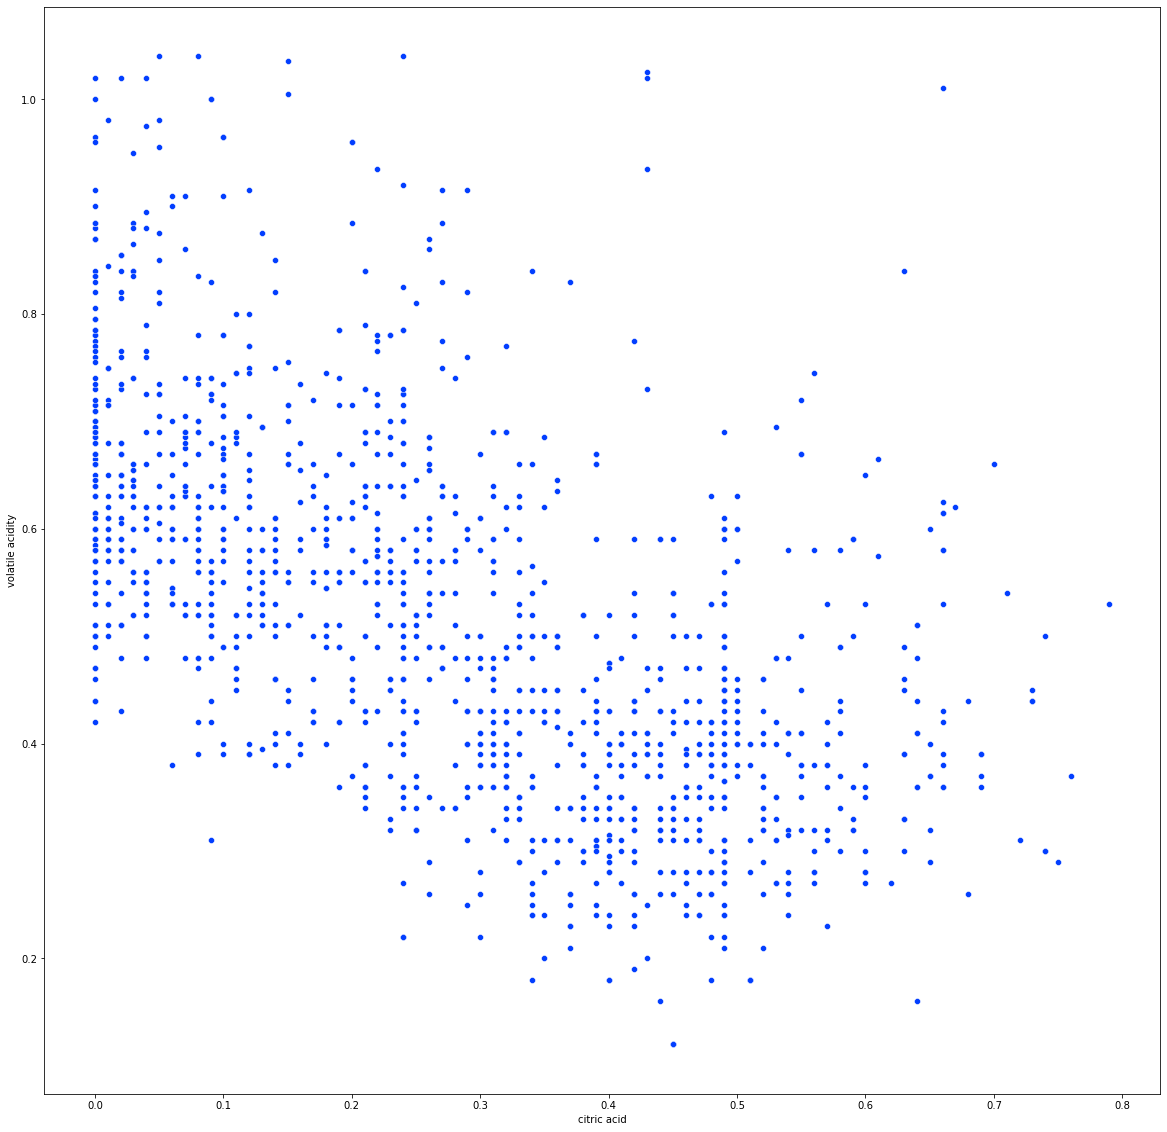

In [33]:
plt.figure(figsize=(20,20))
sns.scatterplot(x=data['citric acid'],y=data['volatile acidity'],data=data)
plt.show()

*  Trend observed does not of that much extent in citric acid volatile acid

* relationship between free sufur dioxide and total sulfur dioxide

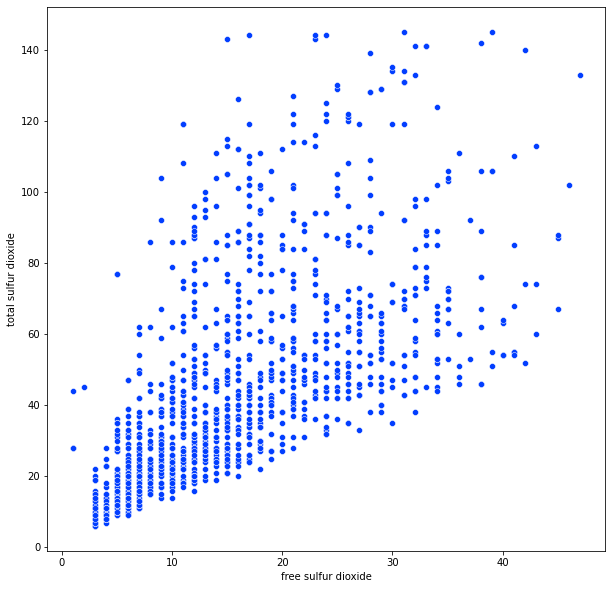

In [34]:
plt.figure(figsize=(10,10))
sns.scatterplot(x=data['free sulfur dioxide'],y=data['total sulfur dioxide'],data=data)
plt.show()

* Relation between free sulfur and total sulfur

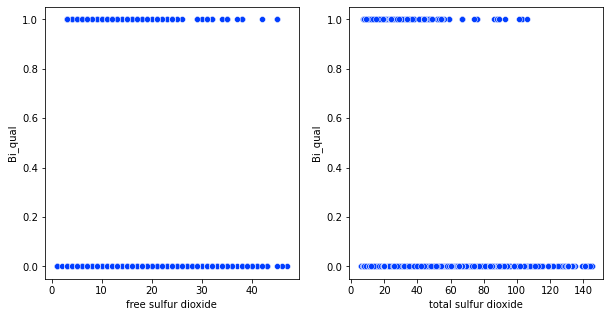

In [35]:
f=plt.figure(figsize=(10,5))
f.add_subplot(1,2,1)
sns.scatterplot(x=data['free sulfur dioxide'],y=data['Bi_qual'],data=data)
f.add_subplot(1,2,2)
sns.scatterplot(x=data['total sulfur dioxide'],y=data['Bi_qual'],data=data)
plt.show()

* we can remove free sulfur dioxide as it has low correlation with target feature

* we can remove three features fixed acidity , citric acid and free sulfur dioxide 
before that we wil analyze Variance Inflation factor

In [36]:
from statsmodels.stats.outliers_influence  import variance_inflation_factor
# feature vs feature only for continuous data

In [37]:
feat1=data.drop('Bi_qual',axis=1).to_numpy() # feature convert to numpy array 
m1=data.drop('Bi_qual',axis=1)

VIF1=pd.DataFrame()

VIF1['Features']=m1.columns
VIF1['vif']=[variance_inflation_factor(feat1,i)  for i in range(m1.shape[1])]
VIF1

,Features,vif
0,fixed acidity,89.062951
1,volatile acidity,19.516207
2,citric acid,9.358509
3,residual sugar,9.848772
4,chlorides,17.793186
5,free sulfur dioxide,6.992696
6,total sulfur dioxide,6.938010
7,density,1691.718249
8,pH,1239.248523
9,sulphates,31.829770


* let us remove density having highest vif score among this feature ,check vif after removing density feature 



In [38]:
feat2=data.drop(['density','Bi_qual'],axis=1).to_numpy() # feature convert to numpy array 
m2=data.drop(['density','Bi_qual'],axis=1)

VIF2=pd.DataFrame()

VIF2['Features']=m2.columns
VIF2['vif']=[variance_inflation_factor(feat2,i)  for i in range(m2.shape[1])]
VIF2

,Features,vif
0,fixed acidity,49.219057
1,volatile acidity,19.513319
2,citric acid,9.328343
3,residual sugar,9.785643
4,chlorides,17.241402
5,free sulfur dioxide,6.952802
6,total sulfur dioxide,6.655285
7,pH,187.744377
8,sulphates,31.751823
9,alcohol,137.329092


* let us remove pH having highest vif score among this feature ,check vif after removing pH feature 

In [39]:
feat3=data.drop(['density','pH','Bi_qual'],axis=1).to_numpy() # feature convert to numpy array 
m3=data.drop(['density','pH','Bi_qual'],axis=1)

VIF3=pd.DataFrame()

VIF3['Features']=m3.columns
VIF3['vif']=[variance_inflation_factor(feat3,i)  for i in range(m3.shape[1])]
VIF3

,Features,vif
0,fixed acidity,47.777791
1,volatile acidity,17.779511
2,citric acid,8.890254
3,residual sugar,9.714324
4,chlorides,16.120263
5,free sulfur dioxide,6.945346
6,total sulfur dioxide,6.415671
7,sulphates,29.970124
8,alcohol,52.299592


* let us remove alcohol having highest vif score among this feature ,check vif after removing alcohol feature 

In [40]:
feat4=data.drop(['density','pH','alcohol','Bi_qual'],axis=1).to_numpy() # feature convert to numpy array 
m4=data.drop(['density','pH','alcohol','Bi_qual'],axis=1)

VIF4=pd.DataFrame()

VIF4['Features']=m4.columns
VIF4['vif']=[variance_inflation_factor(feat4,i)  for i in range(m4.shape[1])]
VIF4

,Features,vif
0,fixed acidity,44.659332
1,volatile acidity,15.535420
2,citric acid,8.882931
3,residual sugar,9.253049
4,chlorides,16.087443
5,free sulfur dioxide,6.703005
6,total sulfur dioxide,6.221403
7,sulphates,20.470010


* let us remove fixed acidity having highest vif score among this feature ,check vif after removing fixed acidity feature 

In [41]:
feat5=data.drop(['density','pH','fixed acidity','alcohol','Bi_qual'],axis=1).to_numpy() # feature convert to numpy array 
m5=data.drop(['density','pH','fixed acidity','alcohol','Bi_qual'],axis=1)

VIF5=pd.DataFrame()

VIF5['Features']=m5.columns
VIF5['vif']=[variance_inflation_factor(feat5,i)  for i in range(m5.shape[1])]
VIF5

,Features,vif
0,volatile acidity,11.638771
1,citric acid,4.695159
2,residual sugar,9.159208
3,chlorides,14.884337
4,free sulfur dioxide,6.664532
5,total sulfur dioxide,6.098175
6,sulphates,17.328164


* let us remove sulphates having highest vif score among this feature ,check vif after removing sulphates feature 

In [42]:
feat6=data.drop(['density','pH','fixed acidity','alcohol','sulphates','Bi_qual'],axis=1).to_numpy() # feature convert to numpy array 
m6=data.drop(['density','pH','fixed acidity','alcohol','sulphates','Bi_qual'],axis=1)

VIF6=pd.DataFrame()

VIF6['Features']=m6.columns
VIF6['vif']=[variance_inflation_factor(feat6,i)  for i in range(m6.shape[1])]
VIF6 

,Features,vif
0,volatile acidity,10.477118
1,citric acid,3.830751
2,residual sugar,8.777523
3,chlorides,13.131147
4,free sulfur dioxide,6.023003
5,total sulfur dioxide,5.926747


* vif score reduce to 10 and below 10 after removal of 05 feature sequentially density,
pH,fixed acidity,alcohol, sulphates 

* let us again see correlation in data set


In [43]:
corr_target=data.drop("Bi_qual",axis=1).corrwith(data["Bi_qual"]).abs()
corr_target.sort_values(ascending=False)

alcohol                 0.430967
sulphates               0.310206
volatile acidity        0.268236
citric acid             0.226809
total sulfur dioxide    0.171294
density                 0.154221
fixed acidity           0.124746
residual sugar          0.115612
chlorides               0.112431
free sulfur dioxide     0.085448
pH                      0.079528
dtype: float64

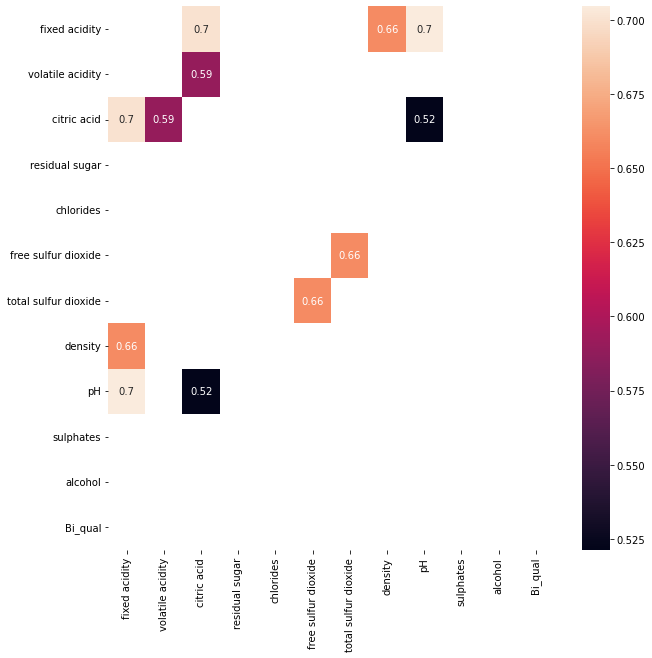

In [44]:
plt.figure(figsize=(10,10))
sns.heatmap(corr[(corr>0.5)&(corr != 1)],annot=True)
plt.show()

* 1) From analysis observed in Correlation and VIF ,it is required to remove more than 30% features from data having correation      with other feature (i.e. Multicollinearity issue)   
  2) within these feature some have high correlation with target variable.
     Also these features can not be removed 
  3) To overcome curse of diamensionality, It is required to apply dimensionality reduction technique i.e. PCA 
     

* Analyse skewness in data

In [45]:
feature=data.columns[data.columns!='Bi_qual']
feature

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol'],
      dtype='object')

In [46]:
data[feature].skew()

fixed acidity           0.820879
volatile acidity        0.392097
citric acid             0.292600
residual sugar          2.450707
chlorides               2.307274
free sulfur dioxide     0.869727
total sulfur dioxide    1.185230
density                 0.055543
pH                      0.113039
sulphates               0.893297
alcohol                 0.757396
dtype: float64

<AxesSubplot:>

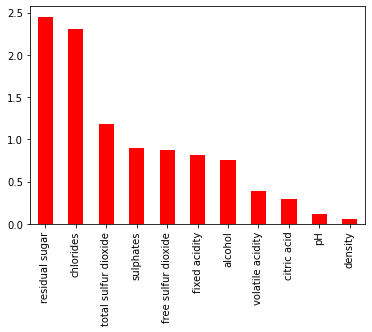

In [47]:
sk=data[feature].skew().abs().sort_values(ascending=False)
sk.plot.bar(color="red")


tarnsform data by Power,log, sqaureroot,  transformation on all feture as all are continuous 

In [48]:
from sklearn.preprocessing import PowerTransformer
pwr=PowerTransformer(method="yeo-johnson")
tra_fea=pwr.fit_transform(data[feature])

In [49]:
log_trans=np.log(data[feature])   # log TRansformation

In [50]:
sqrt_trans=np.sqrt(data[feature])  # sqaure root transformation

* powerTransformation

In [51]:
a=pd.DataFrame(tra_fea)
a.skew().abs()

0     0.019079
1     0.005289
2     0.018652
3     0.003351
4     0.115179
5     0.021273
6     0.005751
7     0.000989
8     0.000062
9     0.021132
10    0.108436
dtype: float64

<AxesSubplot:>

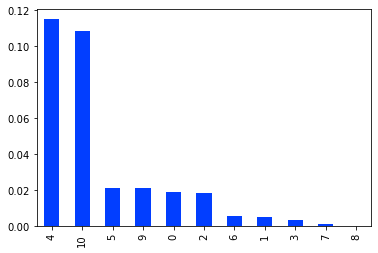

In [52]:
a=pd.DataFrame(tra_fea)
sk1=a.skew().abs().sort_values(ascending=False)
sk1.plot.bar()


* log Transformation

In [53]:
log_trans.skew()

fixed acidity           0.377100
volatile acidity       -0.509599
citric acid                  NaN
residual sugar          1.229070
chlorides               0.528828
free sulfur dioxide    -0.300264
total sulfur dioxide   -0.095735
density                 0.049895
pH                     -0.017060
sulphates               0.345344
alcohol                 0.588835
dtype: float64

<AxesSubplot:>

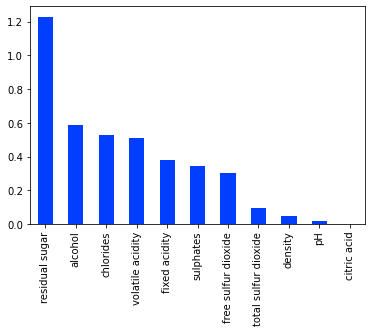

In [54]:
sk2=log_trans.skew().abs().sort_values(ascending=False)
sk2.plot.bar()


* squareroot Trannsformtion 

In [55]:
sqrt_trans.skew()

fixed acidity           0.601708
volatile acidity       -0.034868
citric acid            -0.519559
residual sugar          1.834049
chlorides               1.342480
free sulfur dioxide     0.321688
total sulfur dioxide    0.557596
density                 0.052719
pH                      0.048139
sulphates               0.617279
alcohol                 0.671764
dtype: float64

<AxesSubplot:>

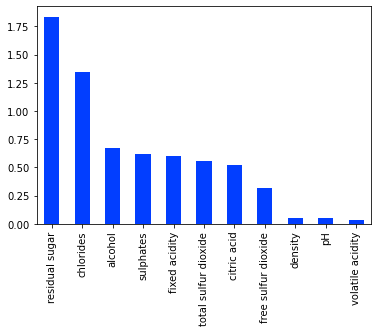

In [56]:
sk3=sqrt_trans.skew().abs().sort_values(ascending=False)
sk3.plot.bar()


* As from above graphs ,I am sure to use yeo-johnson tranformation on feature which reduce skewness

In [57]:
from sklearn.preprocessing import PowerTransformer
pwr=PowerTransformer(method="yeo-johnson")
data[feature]=pwr.fit_transform(data[feature])

* Analyse skewness after transformation

In [58]:
data[feature].skew()

fixed acidity           0.019079
volatile acidity        0.005289
citric acid             0.018652
residual sugar         -0.003351
chlorides              -0.115179
free sulfur dioxide    -0.021273
total sulfur dioxide   -0.005751
density                -0.000989
pH                     -0.000062
sulphates               0.021132
alcohol                 0.108436
dtype: float64

<AxesSubplot:>

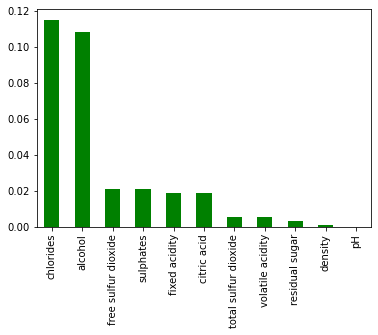

In [59]:
sk=data[feature].skew().abs().sort_values(ascending=False)
sk.plot.bar(color='green')

* scaling Feature 

In [60]:
x=data.drop('Bi_qual',axis=1)
y=data['Bi_qual']

In [61]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x_scaled=scaler.fit_transform(x)

* PCA on feature having mulyicollinearity 

In [62]:
from sklearn.decomposition import PCA

pca=PCA()
pca.fit_transform(x_scaled)

array([[ 1.70129274, -1.18848165,  1.26193883, ..., -0.36898005,
         0.29049115, -0.11033255],
       [ 0.60859592, -2.36338833,  0.04802681, ..., -0.23084127,
        -0.10781042, -0.00687177],
       [ 0.56338488, -1.57879415,  0.48761983, ..., -0.05194851,
         0.24370633, -0.0026866 ],
       ...,
       [ 1.57645723,  0.0210236 , -1.59555985, ..., -0.36616948,
        -0.50165803,  0.52555386],
       [ 2.67036726, -0.63027596, -1.33190033, ...,  0.09445997,
        -0.87556104,  0.20633037],
       [ 0.47166215,  0.93796439, -1.94062353, ...,  0.60577573,
        -0.63553219,  0.62307988]])

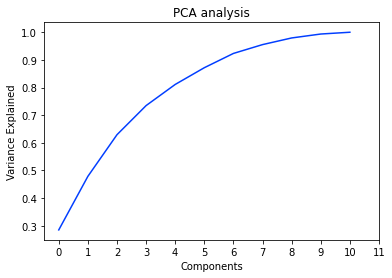

In [63]:
plt.figure()
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Components')
plt.ylabel('Variance Explained')
plt.title('PCA analysis')
plt.xticks(range(0,12))
plt.show()

In [64]:
np.cumsum(pca.explained_variance_ratio_)   # explained variance

array([0.28488629, 0.47864872, 0.62931317, 0.73466137, 0.81114255,
       0.87172383, 0.92336119, 0.95528627, 0.97934062, 0.99356325,
       1.        ])

* feeding  8 component which explains 95 % of variance in data from 11 components 

In [65]:
pca1=PCA(n_components=8)
new_comp=pca1.fit_transform(x_scaled)
x_comp=pd.DataFrame(new_comp,columns=[('PC{}').format(i) for i in range(1,9)])
x_comp

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8
0,1.701293,-1.188482,1.261939,-0.032378,-0.873323,-0.875140,-0.195484,-0.469362
1,0.608596,-2.363388,0.048027,0.658234,0.013247,0.439491,1.769980,0.908703
2,0.563385,-1.578794,0.487620,0.379763,-0.260342,0.203197,1.095854,0.571540
3,-2.369097,-0.165210,-0.787630,-1.787672,0.493790,-0.173278,-0.573740,-0.444367
4,1.701293,-1.188482,1.261939,-0.032378,-0.873323,-0.875140,-0.195484,-0.469362
...,...,...,...,...,...,...,...,...
1453,2.376716,-0.802449,-0.805766,0.153006,-0.105094,1.178894,-0.012260,-0.144014
1454,2.674654,0.071590,-2.367162,0.683653,-0.345272,-0.341095,0.256291,0.104797
1455,1.576457,0.021024,-1.595560,0.772316,-0.492815,0.299798,0.217077,0.318200
1456,2.670367,-0.630276,-1.331900,0.451536,-0.996461,0.017696,0.008980,-0.209831


* train test data 


In [66]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.ensemble import AdaBoostClassifier

In [67]:
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report

In [68]:
x_comp # feature
y     # target

0       0
1       0
2       0
3       0
4       0
       ..
1594    0
1595    0
1596    0
1597    0
1598    0
Name: Bi_qual, Length: 1458, dtype: int64

In [69]:
from imblearn.over_sampling import SMOTE

sm=SMOTE(0.75,k_neighbors=3,random_state=45)
xus,yus=sm.fit_resample(x_comp,y)



In [70]:
xus.shape

(2199, 8)

<AxesSubplot:>

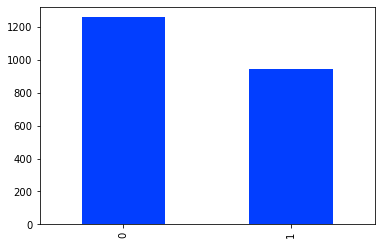

In [71]:
yus.value_counts().plot.bar()

In [72]:
from sklearn.model_selection import train_test_split


maxac=0
maxRs=0
for i  in range(1,200):
    x_train,x_test,y_train,y_test=train_test_split(xus,yus,test_size=0.30,random_state=i)
    clf=LogisticRegression()
    clf.fit(x_train,y_train)
    y_pred=clf.predict(x_test)
    acc=accuracy_score(y_test,y_pred)
    print("acuracy score ",acc,'Random sate ',i)
    
    if acc>maxac:
        maxac=acc
        maxRs=i
        print("Accuracy",maxac,"random_state",i)
        
        

acuracy score  0.8333333333333334 Random sate  1
Accuracy 0.8333333333333334 random_state 1
acuracy score  0.8242424242424242 Random sate  2
acuracy score  0.8272727272727273 Random sate  3
acuracy score  0.8424242424242424 Random sate  4
Accuracy 0.8424242424242424 random_state 4
acuracy score  0.8196969696969697 Random sate  5
acuracy score  0.8166666666666667 Random sate  6
acuracy score  0.8348484848484848 Random sate  7
acuracy score  0.8393939393939394 Random sate  8
acuracy score  0.8121212121212121 Random sate  9
acuracy score  0.8242424242424242 Random sate  10
acuracy score  0.806060606060606 Random sate  11
acuracy score  0.8318181818181818 Random sate  12
acuracy score  0.8333333333333334 Random sate  13
acuracy score  0.8378787878787879 Random sate  14
acuracy score  0.803030303030303 Random sate  15
acuracy score  0.8181818181818182 Random sate  16
acuracy score  0.8227272727272728 Random sate  17
acuracy score  0.8454545454545455 Random sate  18
Accuracy 0.84545454545454

In [73]:
print("Maximum accuracy Score is {0} and Random state is {1}".format(maxac,i))

Maximum accuracy Score is 0.8621212121212121 and Random state is 199


* split data using obtained random_state

In [74]:
x_train,x_test,y_train,y_test=train_test_split(xus,yus,test_size=0.30,random_state=199)

In [75]:
y_train.value_counts()

0    884
1    655
Name: Bi_qual, dtype: int64

* Upsample target variable of trainig data

<AxesSubplot:>

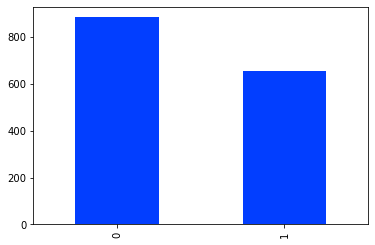

In [76]:
y_train.value_counts().plot.bar()

* letus use oversampling for handling imbalanced in dataset

In [77]:
from sklearn.metrics import roc_curve,roc_auc_score,plot_roc_curve


* let us define function to calculate evaluations

In [78]:
def Cscore(clf,x_trn,y_trn,x_tst,y_tst,train_score=True):
    if train_score:
        ypred_train=clf.predict(x_trn)
        print('******** Train Results***************')
        print("Train Accuracy Score is ",accuracy_score(y_trn,ypred_train))
        print('******************************************************')
        print("Train roc_auc_Score is ",roc_auc_score(y_trn,ypred_train))
        print('-'*50)
        
    elif train_score==False:
        ypred_test=clf.predict(x_tst)
        print('\n******** Test Results***************')
        print("Test Accuracy Score is ", accuracy_score(y_tst,ypred_test))
        print('******************************************************')
        print("Test roc_auc_Score is ",roc_auc_score(y_tst,ypred_test))
        print('-'*50)
        print('\n Classification Report \n ',classification_report(y_tst,ypred_test,digits=3))
        

In [79]:
# logistic Rgression

LGR=LogisticRegression()
LGR.fit(x_train,y_train)

Cscore(LGR,x_train,y_train,x_test,y_test,train_score=True)
Cscore(LGR,x_train,y_train,x_test,y_test,train_score=False)

******** Train Results***************
Train Accuracy Score is  0.8304093567251462
******************************************************
Train roc_auc_Score is  0.8288435632620634
--------------------------------------------------

******** Test Results***************
Test Accuracy Score is  0.8287878787878787
******************************************************
Test roc_auc_Score is  0.8304499724430411
--------------------------------------------------

 Classification Report 
                precision    recall  f1-score   support

           0      0.871     0.818     0.844       373
           1      0.781     0.843     0.811       287

    accuracy                          0.829       660
   macro avg      0.826     0.830     0.827       660
weighted avg      0.832     0.829     0.829       660



In [80]:
# KNeighborsClassifier

knn=KNeighborsClassifier()
knn.fit(x_train,y_train)

Cscore(knn,x_train,y_train,x_test,y_test,train_score=True)
Cscore(knn,x_train,y_train,x_test,y_test,train_score=False)

******** Train Results***************
Train Accuracy Score is  0.916829109811566
******************************************************
Train roc_auc_Score is  0.9258220786846741
--------------------------------------------------

******** Test Results***************
Test Accuracy Score is  0.8696969696969697
******************************************************
Test roc_auc_Score is  0.8811033993143454
--------------------------------------------------

 Classification Report 
                precision    recall  f1-score   support

           0      0.970     0.794     0.873       373
           1      0.783     0.969     0.866       287

    accuracy                          0.870       660
   macro avg      0.877     0.881     0.870       660
weighted avg      0.889     0.870     0.870       660



In [81]:
# GradientBoostingClassifier

gbdt=GradientBoostingClassifier()
gbdt.fit(x_train,y_train)

Cscore(gbdt,x_train,y_train,x_test,y_test,train_score=True)
Cscore(gbdt,x_train,y_train,x_test,y_test,train_score=False)

******** Train Results***************
Train Accuracy Score is  0.9519168291098116
******************************************************
Train roc_auc_Score is  0.952212358813167
--------------------------------------------------

******** Test Results***************
Test Accuracy Score is  0.8924242424242425
******************************************************
Test roc_auc_Score is  0.8967921831650335
--------------------------------------------------

 Classification Report 
                precision    recall  f1-score   support

           0      0.942     0.863     0.901       373
           1      0.840     0.930     0.883       287

    accuracy                          0.892       660
   macro avg      0.891     0.897     0.892       660
weighted avg      0.897     0.892     0.893       660



In [82]:
#DecisionTreeClassifier

dt=DecisionTreeClassifier()
dt.fit(x_train,y_train)

Cscore(dt,x_train,y_train,x_test,y_test,train_score=True)
Cscore(dt,x_train,y_train,x_test,y_test,train_score=False)

******** Train Results***************
Train Accuracy Score is  1.0
******************************************************
Train roc_auc_Score is  1.0
--------------------------------------------------

******** Test Results***************
Test Accuracy Score is  0.8909090909090909
******************************************************
Test roc_auc_Score is  0.8894265350160204
--------------------------------------------------

 Classification Report 
                precision    recall  f1-score   support

           0      0.906     0.901     0.903       373
           1      0.872     0.878     0.875       287

    accuracy                          0.891       660
   macro avg      0.889     0.889     0.889       660
weighted avg      0.891     0.891     0.891       660



In [83]:
#RandomForestClassifier




rf=RandomForestClassifier()
rf.fit(x_train,y_train)

Cscore(rf,x_train,y_train,x_test,y_test,train_score=True)
Cscore(rf,x_train,y_train,x_test,y_test,train_score=False)



******** Train Results***************
Train Accuracy Score is  1.0
******************************************************
Train roc_auc_Score is  1.0
--------------------------------------------------

******** Test Results***************
Test Accuracy Score is  0.9348484848484848
******************************************************
Test roc_auc_Score is  0.9367357614594912
--------------------------------------------------

 Classification Report 
                precision    recall  f1-score   support

           0      0.961     0.922     0.941       373
           1      0.904     0.951     0.927       287

    accuracy                          0.935       660
   macro avg      0.932     0.937     0.934       660
weighted avg      0.936     0.935     0.935       660



In [84]:
# XGBClassifier
xgc=XGBClassifier()
xgc.fit(x_train,y_train)

Cscore(xgc,x_train,y_train,x_test,y_test,train_score=True)
Cscore(xgc,x_train,y_train,x_test,y_test,train_score=False)


******** Train Results***************
Train Accuracy Score is  1.0
******************************************************
Train roc_auc_Score is  1.0
--------------------------------------------------

******** Test Results***************
Test Accuracy Score is  0.9424242424242424
******************************************************
Test roc_auc_Score is  0.9446432074431813
--------------------------------------------------

 Classification Report 
                precision    recall  f1-score   support

           0      0.969     0.928     0.948       373
           1      0.911     0.962     0.936       287

    accuracy                          0.942       660
   macro avg      0.940     0.945     0.942       660
weighted avg      0.944     0.942     0.943       660



In [85]:
# AdaBoostClassifier
adac=AdaBoostClassifier()
adac.fit(x_train,y_train)

Cscore(adac,x_train,y_train,x_test,y_test,train_score=True)
Cscore(adac,x_train,y_train,x_test,y_test,train_score=False)


******** Train Results***************
Train Accuracy Score is  0.8921377517868746
******************************************************
Train roc_auc_Score is  0.8920684950433491
--------------------------------------------------

******** Test Results***************
Test Accuracy Score is  0.85
******************************************************
Test roc_auc_Score is  0.853635183230423
--------------------------------------------------

 Classification Report 
                precision    recall  f1-score   support

           0      0.901     0.826     0.862       373
           1      0.796     0.882     0.836       287

    accuracy                          0.850       660
   macro avg      0.848     0.854     0.849       660
weighted avg      0.855     0.850     0.851       660



* To Analyse overfitting in algorithms,with cross validation technique



* To Analyse overfitting in algorithms,with cross validation technique


In [86]:
from sklearn.model_selection import cross_val_score

In [87]:
classifiers =[LGR,knn,gbdt,dt,rf,xgc,adac]
name=['LogisticRegression','KNeighborsClassifier','GradientBoostClassifier',
      'DecisionTreeClassifier','RandomForestClassifier','XGBoostClassifier','AdaBoostClassifier']
score=[]

for i in classifiers:
    cv_score=cross_val_score(i,xus,yus,cv=10,scoring="accuracy")
    score.append((cv_score.mean())*100)
    
    

In [88]:
#test accuracy of algorithm
test_score=[]
ra_score=[]
for i in classifiers:
    ypred_test=i.predict(x_test)
    test_score.append((accuracy_score(y_test,ypred_test))*100)
    ra_score.append(roc_auc_score(y_test,ypred_test))

In [89]:
# difference between test score and cv score
dif=[]
for ts ,cvs in zip(test_score,score):
    dif.append(ts-cvs)
    
  

In [90]:
# Dataframe to analyse best agorithm
Algo=pd.DataFrame({'Name':name,"Test Accuracy score":test_score,'Cross_val_score':score,'roc_auc_score':ra_score,
                   'Difference':np.abs(dif)})


In [91]:
# i have take absolute values of difference between test_accuracy_score and cross_validation_score

Algo.sort_values(by='Difference',ascending=True)

,Name,Test Accuracy score,Cross_val_score,roc_auc_score,Difference
1,KNeighborsClassifier,86.969697,87.582399,0.881103,0.612702
3,DecisionTreeClassifier,89.090909,88.401619,0.889427,0.689290
4,RandomForestClassifier,93.484848,94.179535,0.936736,0.694687
5,XGBoostClassifier,94.242424,92.996472,0.944643,1.245953
0,LogisticRegression,82.878788,81.625778,0.830450,1.253010
6,AdaBoostClassifier,85.000000,83.083230,0.853635,1.916770
2,GradientBoostClassifier,89.242424,87.218971,0.896792,2.023454


In [92]:
Algo[Algo['Test Accuracy score']<Algo['Cross_val_score']].sort_values(by="Difference",ascending=True)

,Name,Test Accuracy score,Cross_val_score,roc_auc_score,Difference
1,KNeighborsClassifier,86.969697,87.582399,0.881103,0.612702
4,RandomForestClassifier,93.484848,94.179535,0.936736,0.694687


* plotting roc auc cuve for algorithms 

In [93]:
from sklearn.metrics import roc_curve,roc_auc_score,plot_roc_curve


* ROC curve for Train data

<Figure size 1440x1440 with 0 Axes>

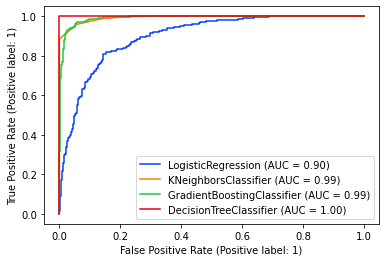

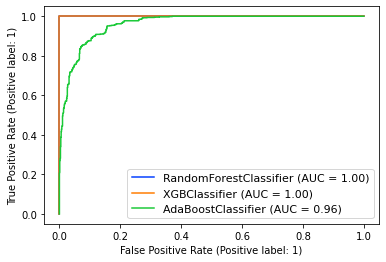

In [94]:
plt.figure(figsize=(20,20))
fig2=plot_roc_curve(LGR,x_train,y_train)
plot_roc_curve(knn,x_train,y_train,ax=fig2.ax_)
plot_roc_curve(gbdt,x_train,y_train,ax=fig2.ax_)
plot_roc_curve(dt,x_train,y_train,ax=fig2.ax_)


fig3=plot_roc_curve(rf,x_train,y_train)
plot_roc_curve(xgc,x_train,y_train,ax=fig3.ax_)
plot_roc_curve(adac,x_train,y_train,ax=fig3.ax_)

plt.legend(prop={'size':11},loc='lower right')
plt.show()

* ROC curve for Test data

<Figure size 1440x1440 with 0 Axes>

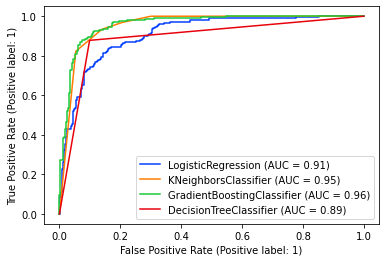

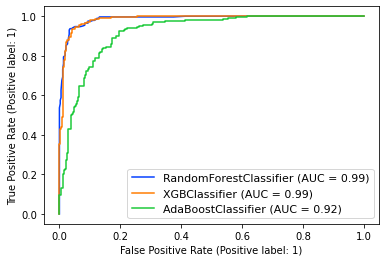

In [95]:
plt.figure(figsize=(20,20))
fig=plot_roc_curve(LGR,x_test,y_test)
plot_roc_curve(knn,x_test,y_test,ax=fig.ax_)
plot_roc_curve(gbdt,x_test,y_test,ax=fig.ax_)
plot_roc_curve(dt,x_test,y_test,ax=fig.ax_)


fig1=plot_roc_curve(rf,x_test,y_test)
plot_roc_curve(xgc,x_test,y_test,ax=fig1.ax_)
plot_roc_curve(adac,x_test,y_test,ax=fig1.ax_)

plt.legend(prop={'size':11},loc='lower right')
plt.show()

* RandomForestClassifier is performing best among all other algorithms 

 1) accuracy score is highest

 2) Deviation in validatin score and testing score is also lowest among algorithms

 3)roc_auc_score is also highest 

 4) The AUC is o.99 for testing and 1.00 for training 

* Hyperparameter tunning on KNearestClassifier

In [96]:
from sklearn.model_selection import GridSearchCV


param1={'n_neighbors':[3,5,7,9,11,13,15],'metric':["minkowski",'cosine'],'leaf_size':[20,25,30,35,40,45,50],
        'weights':['uniform','distance'],'algorithm' : ['auto', 'ball_tree', 'kd_tree', 'brute'],'p':[1,2]}

grid1=GridSearchCV(KNeighborsClassifier(),param_grid=param1,cv=5).fit(x_train,y_train) 
print(grid1.best_params_)
     


{'algorithm': 'auto', 'leaf_size': 20, 'metric': 'minkowski', 'n_neighbors': 3, 'p': 1, 'weights': 'distance'}


In [97]:
knn1=grid1.best_estimator_

Cscore(knn1,x_train,y_train,x_test,y_test,train_score=True)
Cscore(knn1,x_train,y_train,x_test,y_test,train_score=False)


******** Train Results***************
Train Accuracy Score is  1.0
******************************************************
Train roc_auc_Score is  1.0
--------------------------------------------------

******** Test Results***************
Test Accuracy Score is  0.9121212121212121
******************************************************
Test roc_auc_Score is  0.9214486553138225
--------------------------------------------------

 Classification Report 
                precision    recall  f1-score   support

           0      0.994     0.850     0.916       373
           1      0.836     0.993     0.908       287

    accuracy                          0.912       660
   macro avg      0.915     0.921     0.912       660
weighted avg      0.925     0.912     0.912       660



* Hyperparameter tunning on DecisionTreeClassifier

In [98]:
param2={'criterion' : ['gini','entropy'],
                     'max_depth' :[3,4,5,6,7,9,11],
                      'min_samples_split' :[12,15,18,20,23,25], 
                     'min_samples_leaf' :[4,5,6,7,8,9],
                    'max_leaf_nodes':[30,50,70,100]
                      }

grid2=GridSearchCV(DecisionTreeClassifier(),param_grid=param2,cv=5).fit(x_train,y_train) 
print(grid2.best_params_)

{'criterion': 'entropy', 'max_depth': 11, 'max_leaf_nodes': 100, 'min_samples_leaf': 8, 'min_samples_split': 15}


In [99]:
DTC1=grid2.best_estimator_

Cscore(DTC1,x_train,y_train,x_test,y_test,train_score=True)
Cscore(DTC1,x_train,y_train,x_test,y_test,train_score=False)


******** Train Results***************
Train Accuracy Score is  0.9285250162443145
******************************************************
Train roc_auc_Score is  0.9265111740527098
--------------------------------------------------

******** Test Results***************
Test Accuracy Score is  0.8454545454545455
******************************************************
Test roc_auc_Score is  0.845195280754033
--------------------------------------------------

 Classification Report 
                precision    recall  f1-score   support

           0      0.875     0.847     0.861       373
           1      0.809     0.843     0.826       287

    accuracy                          0.845       660
   macro avg      0.842     0.845     0.843       660
weighted avg      0.847     0.845     0.846       660



* Hyperparameter tunning on RandomForestClassifier

In [100]:
param3={'criterion' : ['gini','entropy','log_loss'],
                     'max_depth' :[4,5,6,7,8,9],
                      'min_samples_split' :[1,2,3,4,5,7], 
                     'min_samples_leaf' :[1,2,3,4,5,6],
                     'bootstrap':['True'],
                      'oob_score':['True'],
                     'max_samples' : [0.7,0.8],
                     
                      }


grid3=GridSearchCV(RandomForestClassifier(),param_grid=param3,cv=5).fit(x_train,y_train) 
print(grid3.best_params_)


{'bootstrap': 'True', 'criterion': 'gini', 'max_depth': 9, 'max_samples': 0.8, 'min_samples_leaf': 1, 'min_samples_split': 2, 'oob_score': 'True'}


In [101]:
RF1=grid3.best_estimator_

Cscore(RF1,x_train,y_train,x_test,y_test,train_score=True)
Cscore(RF1,x_train,y_train,x_test,y_test,train_score=False)


******** Train Results***************
Train Accuracy Score is  0.9824561403508771
******************************************************
Train roc_auc_Score is  0.9835420192739456
--------------------------------------------------

******** Test Results***************
Test Accuracy Score is  0.9242424242424242
******************************************************
Test roc_auc_Score is  0.9277540611484247
--------------------------------------------------

 Classification Report 
                precision    recall  f1-score   support

           0      0.963     0.901     0.931       373
           1      0.881     0.955     0.916       287

    accuracy                          0.924       660
   macro avg      0.922     0.928     0.924       660
weighted avg      0.927     0.924     0.925       660



* ROC curve for train data of tuned algorithms

<Figure size 1440x1440 with 0 Axes>

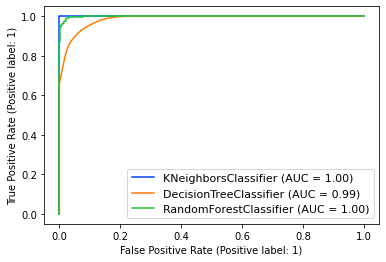

In [102]:
plt.figure(figsize=(20,20))
fig3=plot_roc_curve(knn1,x_train,y_train)
plot_roc_curve(DTC1,x_train,y_train,ax=fig3.ax_)
plot_roc_curve(RF1,x_train,y_train,ax=fig3.ax_)
plt.legend(prop={'size':11},loc='lower right')
plt.show()


* ROC curve for test data of tuned algorithms

<Figure size 1440x1440 with 0 Axes>

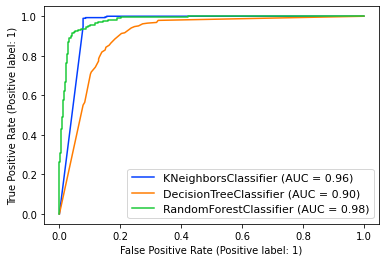

In [103]:
plt.figure(figsize=(20,20))
fig=plot_roc_curve(knn1,x_test,y_test)
plot_roc_curve(DTC1,x_test,y_test,ax=fig.ax_)
plot_roc_curve(RF1,x_test,y_test,ax=fig.ax_)
plt.legend(prop={'size':11},loc='lower right')
plt.show()

* The performance of RandomforestClassifier is best without Hyperparameter tunning 
so it is obvious that RandomForestClassifier with default parameter is final model 

* saving and finalizing model

* RandomForestClassifier with default parameter is finalize having accuracy score of 0.9484 and validation score of 0.94
  with roc_auc_score of 0.9508    and auc having 0.99 in test data, 1.00 in train data

In [104]:
#RandomForestClassifier

rf=RandomForestClassifier()
rf.fit(x_train,y_train)

Cscore(rf,x_train,y_train,x_test,y_test,train_score=True)
Cscore(rf,x_train,y_train,x_test,y_test,train_score=False)


******** Train Results***************
Train Accuracy Score is  1.0
******************************************************
Train roc_auc_Score is  1.0
--------------------------------------------------

******** Test Results***************
Test Accuracy Score is  0.9484848484848485
******************************************************
Test roc_auc_Score is  0.9508084931481255
--------------------------------------------------

 Classification Report 
                precision    recall  f1-score   support

           0      0.975     0.933     0.953       373
           1      0.917     0.969     0.942       287

    accuracy                          0.948       660
   macro avg      0.946     0.951     0.948       660
weighted avg      0.950     0.948     0.949       660



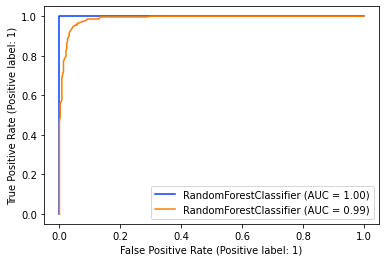

In [105]:
fig5=plot_roc_curve(rf,x_train,y_train)
plot_roc_curve(rf,x_test,y_test,ax=fig5.ax_)

In [106]:
import joblib
joblib.dump(rf,"RedwineQUaRF.pkl")

['RedwineQUaRF.pkl']